'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Modern Challenge | MAGIC: THE GATHERING\n  </title>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="Bracket Decklists Standings Bracket   Quarterfinals  Semifinals  Finals  Champion  1 Laplasjan  Laplasjan, 2-1    8 s063  Laplasjan, 2-0     4 cicciogire  cicciogire, 2-0  Laplasjan, 2-0  5 DemonicTutors      2 UnsungZero  UnsungZero, 2-1  7 NicolasP  UnsungZero, 2-0      3 O_danielakos  O_danielakos, 2-0  6 CharlieTheBananaKing   Decklists [decklist] Title: Laplasjan (1st" name="description"/>\n  <meta content="Drupal 7 (http://drupal.org)" name="generator"/>\n  <link href="https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-12-20" rel="canonical"/>\n  <link href="https://magic.wizards.com/en/node/1570396" rel="shortlink"/>\n  <meta content="MAGIC: THE GATHERING" property="og:site_name"/>\n  <meta content="article" property="og:ty
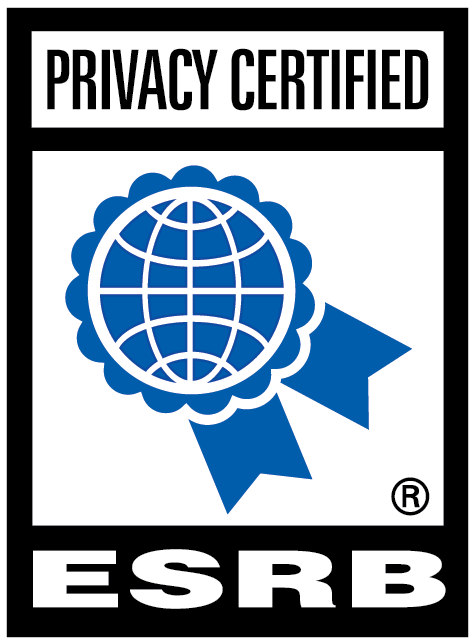

In [1]:
import numpy as np, requests, pandas as pd, re
from bs4 import BeautifulSoup

r = requests.get("https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-12-20")
soup = BeautifulSoup(r.text, "html.parser")
soup.prettify()

In [2]:
soup.find_all('div', 'sorted-by-overview-container sortedContainer')

[<div class="sorted-by-overview-container sortedContainer" style="">
 <div class="sorted-by-creature clearfix element">
 <h5>Creature (20)</h5>
 <span class="row">
 <span class="card-count">4</span>
 <span class="card-name"><a class="deck-list-link" data-cardexpansion="MH2" data-cardnumber="328" data-gif="https://magic.wizards.com/" data-mp4="https://magic.wizards.com/" data-src="https://gatherer.wizards.com/Handlers/Image.ashx?type=card&amp;name=Esper+Sentinel" data-webm="https://magic.wizards.com/" href="https://gatherer.wizards.com/Pages/Search/Default.aspx?name=+%5BEsper%5D+%5BSentinel%5D">Esper Sentinel</a></span>
 </span>
 <span class="row">
 <span class="card-count">4</span>
 <span class="card-name"><a class="deck-list-link" data-cardexpansion="AFR" data-cardnumber="21" data-gif="https://magic.wizards.com/" data-mp4="https://magic.wizards.com/" data-src="https://gatherer.wizards.com/Handlers/Image.ashx?type=card&amp;name=Ingenious+Smith" data-webm="https://magic.wizards.com/" hr

In [3]:
soup.find_all('div', 'sorted-by-sideboard-container clearfix element')

[<div class="sorted-by-sideboard-container clearfix element">
 <h5>Sideboard (15)</h5>
 <span class="row">
 <span class="card-count">1</span>
 <span class="card-name"><a class="deck-list-link" data-cardexpansion="AKR" data-cardnumber="127" data-gif="https://magic.wizards.com/" data-mp4="https://magic.wizards.com/" data-src="https://gatherer.wizards.com/Handlers/Image.ashx?type=card&amp;name=Thoughtseize" data-webm="https://magic.wizards.com/" href="https://gatherer.wizards.com/Pages/Search/Default.aspx?name=+%5BThoughtseize%5D">Thoughtseize</a></span>
 </span>
 <span class="row">
 <span class="card-count">3</span>
 <span class="card-name"><a class="deck-list-link" data-cardexpansion="NON" data-cardnumber="0" data-gif="https://magic.wizards.com/" data-mp4="https://magic.wizards.com/" data-src="https://gatherer.wizards.com/Handlers/Image.ashx?type=card&amp;name=Dark+Confidant" data-webm="https://magic.wizards.com/" href="https://gatherer.wizards.com/Pages/Search/Default.aspx?name=+%5BDar

In [4]:
maindeck_data_temp = soup.find_all('div', 'sorted-by-overview-container sortedContainer')

In [5]:
sideboard_data_temp = soup.find_all('div', 'sorted-by-sideboard-container clearfix element')

In [28]:
#sideboard div in overview is separate from main deck div. 
#does help keep track of placings.

hashmap = dict()

maindeck_data = []
for deck in maindeck_data_temp:
    maindeck_data.append(str(deck))

sideboard_data = []
for s in sideboard_data_temp:
    sideboard_data.append(str(s))
    
for i in range(0, 32):
    current_deck = maindeck_data[i]
    maindeck_soup = BeautifulSoup(current_deck, "html.parser")
    maindeck_card_info = maindeck_soup.find_all('span', 'row')
    
    in_main = False
    
    for card in maindeck_card_info:
        n_match = re.search('<span class="card-count">(\d+)</span>', str(card))
        num = int(n_match.group(1))
        name_match = re.search('<span class="card-name">(.+)', str(card))
        string_data = str(name_match.group(1))
        name = ''
        
        if string_data[0] == '<':
            loc = string_data.find('>')
            start = loc + 1
            end = 0
            for j in range(start, len(string_data)):
                if string_data[j] == '<':
                    end = j
                    break;
        
            name = string_data[start:end]
        else:
            end = 0
            for j in range(0, len(string_data)):
                if string_data[j] == '<':
                    end = j
            
            name = string_data[0:end]
        
        if name in hashmap.keys():
            card_hash = hashmap[name]
            card_hash['Top 32 Count Main'] = card_hash['Top 32 Count Main'] + 1
            
            if i <= 7:
                card_hash['Top 8 Count Main'] = card_hash['Top 8 Count Main'] + 1
            
            if num == 1:
                card_hash['Main 1'] = card_hash['Main 1'] + 1
            elif num == 2:
                card_hash['Main 2'] = card_hash['Main 2'] + 1
            elif num == 3:
                card_hash['Main 3'] = card_hash['Main 3'] + 1
            elif num == 4:
                card_hash['Main 4'] = card_hash['Main 4'] + 1
        
            hashmap[name] = card_hash
        else:
            if num <= 4:
                card_hash = dict()
                card_hash['Top 32 Count Main'] = 1
                card_hash['Top 8 Count Main'] = 0
                if i <= 7:
                    card_hash['Top 8 Count Main'] = 1
            
                if num == 1:
                    card_hash['Main 1'] = 1
                    card_hash['Main 2'] = 0
                    card_hash['Main 3'] = 0
                    card_hash['Main 4'] = 0
                elif num == 2:
                    card_hash['Main 1'] = 0
                    card_hash['Main 2'] = 1
                    card_hash['Main 3'] = 0
                    card_hash['Main 4'] = 0
                elif num == 3:
                    card_hash['Main 1'] = 0
                    card_hash['Main 2'] = 0
                    card_hash['Main 3'] = 1
                    card_hash['Main 4'] = 0
                elif num == 4:
                    card_hash['Main 1'] = 0
                    card_hash['Main 2'] = 0
                    card_hash['Main 3'] = 0
                    card_hash['Main 4'] = 1
                    
                card_hash['Side 1'] = 0
                card_hash['Side 2'] = 0
                card_hash['Side 3'] = 0
                card_hash['Side 4'] = 0
                card_hash['Top 8 Count Side'] = 0
                card_hash['Top 32 Count Side'] = 0
            
            hashmap[name] = card_hash
                
    current_deck = sideboard_data[i]
    sideboard_soup = BeautifulSoup(current_deck, "html.parser")
    sideboard_card_info = sideboard_soup.find_all('span', 'row')
    
    
    for card in sideboard_card_info:
        n_match = re.search('<span class="card-count">(\d+)</span>', str(card))
        num = int(n_match.group(1))
        name_match = re.search('<span class="card-name">(.+)', str(card))
        string_data = str(name_match.group(1))
        name = ''
        
        if string_data[0] == '<':
            loc = string_data.find('>')
            start = loc + 1
            end = 0
            for j in range(start, len(string_data)):
                if string_data[j] == '<':
                    end = j
                    break;
        
            name = string_data[start:end]
        else:
            end = 0
            for j in range(0, len(string_data)):
                if string_data[j] == '<':
                    end = j
            
            name = string_data[0:end]
            
        if name in hashmap.keys():
            card_hash = hashmap[name]
            card_hash['Top 32 Count Side'] = card_hash['Top 32 Count Side'] + 1
            
            if i <= 7:
                card_hash['Top 8 Count Side'] = card_hash['Top 8 Count Side'] + 1
            
            if num == 1:
                card_hash['Side 1'] = card_hash['Side 1'] + 1
            elif num == 2:
                card_hash['Side 2'] = card_hash['Side 2'] + 1
            elif num == 3:
                card_hash['Side 3'] = card_hash['Side 3'] + 1
            elif num == 4:
                card_hash['Side 4'] = card_hash['Side 4'] + 1
        
            hashmap[name] = card_hash
        else:
            if num <= 4:
                card_hash = dict()
                card_hash['Top 32 Count Side'] = 1
                card_hash['Top 8 Count Side'] = 0
                if i <= 7:
                    card_hash['Top 8 Count Side'] = 1
            
                if num == 1:
                    card_hash['Side 1'] = 1
                    card_hash['Side 2'] = 0
                    card_hash['Side 3'] = 0
                    card_hash['Side 4'] = 0
                elif num == 2:
                    card_hash['Side 1'] = 0
                    card_hash['Side 2'] = 1
                    card_hash['Side 3'] = 0
                    card_hash['Side 4'] = 0
                elif num == 3:
                    card_hash['Side 1'] = 0
                    card_hash['Side 2'] = 0
                    card_hash['Side 3'] = 1
                    card_hash['Side 4'] = 0
                elif num == 4:
                    card_hash['Side 1'] = 0
                    card_hash['Side 2'] = 0
                    card_hash['Side 3'] = 0
                    card_hash['Side 4'] = 1
                    
                card_hash['Main 1'] = 0
                card_hash['Main 2'] = 0
                card_hash['Main 3'] = 0
                card_hash['Main 4'] = 0
                card_hash['Top 8 Count Main'] = 0
                card_hash['Top 32 Count Main'] = 0
            
            hashmap[name] = card_hash




329


In [47]:
challenge_links = ["https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-06-06",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-06-07",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-06-13",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-06-14",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-06-20",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-06-21",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-06-27",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-06-28",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-07-05",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-07-11",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-07-12",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-07-18",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-07-19",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-07-25",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-07-26",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-08-02",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-08-08",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-08-09",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-08-15",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-08-16",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-08-22",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-08-23",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-08-29",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-08-30",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-09-05",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-09-06",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-09-12",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-09-13",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-09-19",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-09-20",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-09-27",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-10-03",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-10-04",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-10-10",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-10-11",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-10-17",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-10-18",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-10-24",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-10-25",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-10-31",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-11-01",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-11-07",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-11-08",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-11-15",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-11-21",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-11-22",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-11-28",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-11-29",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-12-05",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-12-06",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-12-13",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-12-19",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-12-20",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-12-26",
                   "https://magic.wizards.com/en/articles/archive/mtgo-standings/modern-challenge-2021-12-27"
                  ]

In [48]:
hashmap = dict()
for link in challenge_links:
    r = requests.get(link)
    soup = BeautifulSoup(r.text, "html.parser")
    
    maindeck_data_temp = soup.find_all('div', 'sorted-by-overview-container sortedContainer')
    sideboard_data_temp = soup.find_all('div', 'sorted-by-sideboard-container clearfix element')
    
    maindeck_data = []
    for deck in maindeck_data_temp:
        maindeck_data.append(str(deck))

    sideboard_data = []
    for s in sideboard_data_temp:
        sideboard_data.append(str(s))
    
    for i in range(0, 32):
        current_deck = maindeck_data[i]
        maindeck_soup = BeautifulSoup(current_deck, "html.parser")
        maindeck_card_info = maindeck_soup.find_all('span', 'row')
    
        for card in maindeck_card_info:
            n_match = re.search('<span class="card-count">(\d+)</span>', str(card))
            num = int(n_match.group(1))
            name_match = re.search('<span class="card-name">(.+)', str(card))
            string_data = str(name_match.group(1))
            name = ''
        
            if string_data[0] == '<':
                loc = string_data.find('>')
                start = loc + 1
                end = 0
                for j in range(start, len(string_data)):
                    if string_data[j] == '<':
                        end = j
                        break;
        
                name = string_data[start:end]
            else:
                end = 0
                for j in range(0, len(string_data)):
                    if string_data[j] == '<':
                        end = j
            
                name = string_data[0:end]
        
            if name in hashmap.keys():
                card_hash = hashmap[name]
                card_hash['Top 32 Count Main'] = card_hash['Top 32 Count Main'] + 1
            
                if i <= 7:
                    card_hash['Top 8 Count Main'] = card_hash['Top 8 Count Main'] + 1
            
                if num == 1:
                    card_hash['Main 1'] = card_hash['Main 1'] + 1
                elif num == 2:
                    card_hash['Main 2'] = card_hash['Main 2'] + 1
                elif num == 3:
                    card_hash['Main 3'] = card_hash['Main 3'] + 1
                elif num == 4:
                    card_hash['Main 4'] = card_hash['Main 4'] + 1
        
                hashmap[name] = card_hash
            else:
                if num <= 4:
                    card_hash = dict()
                    card_hash['Top 32 Count Main'] = 1
                    card_hash['Top 8 Count Main'] = 0
                    if i <= 7:
                        card_hash['Top 8 Count Main'] = 1
            
                    if num == 1:
                        card_hash['Main 1'] = 1
                        card_hash['Main 2'] = 0
                        card_hash['Main 3'] = 0
                        card_hash['Main 4'] = 0
                    elif num == 2:
                        card_hash['Main 1'] = 0
                        card_hash['Main 2'] = 1
                        card_hash['Main 3'] = 0
                        card_hash['Main 4'] = 0
                    elif num == 3:
                        card_hash['Main 1'] = 0
                        card_hash['Main 2'] = 0
                        card_hash['Main 3'] = 1
                        card_hash['Main 4'] = 0
                    elif num == 4:
                        card_hash['Main 1'] = 0
                        card_hash['Main 2'] = 0
                        card_hash['Main 3'] = 0
                        card_hash['Main 4'] = 1
                    
                    card_hash['Side 1'] = 0
                    card_hash['Side 2'] = 0
                    card_hash['Side 3'] = 0
                    card_hash['Side 4'] = 0
                    card_hash['Top 8 Count Side'] = 0
                    card_hash['Top 32 Count Side'] = 0
            
                hashmap[name] = card_hash
                
        current_deck = sideboard_data[i]
        sideboard_soup = BeautifulSoup(current_deck, "html.parser")
        sideboard_card_info = sideboard_soup.find_all('span', 'row')
    
    
        for card in sideboard_card_info:
            n_match = re.search('<span class="card-count">(\d+)</span>', str(card))
            num = int(n_match.group(1))
            name_match = re.search('<span class="card-name">(.+)', str(card))
            string_data = str(name_match.group(1))
            name = ''
        
            if string_data[0] == '<':
                loc = string_data.find('>')
                start = loc + 1
                end = 0
                for j in range(start, len(string_data)):
                    if string_data[j] == '<':
                        end = j
                        break;
        
                name = string_data[start:end]
            else:
                end = 0
                for j in range(0, len(string_data)):
                    if string_data[j] == '<':
                        end = j
            
                name = string_data[0:end]
            
            if name in hashmap.keys():
                card_hash = hashmap[name]
                card_hash['Top 32 Count Side'] = card_hash['Top 32 Count Side'] + 1
            
                if i <= 7:
                    card_hash['Top 8 Count Side'] = card_hash['Top 8 Count Side'] + 1
            
                if num == 1:
                    card_hash['Side 1'] = card_hash['Side 1'] + 1
                elif num == 2:
                    card_hash['Side 2'] = card_hash['Side 2'] + 1
                elif num == 3:
                    card_hash['Side 3'] = card_hash['Side 3'] + 1
                elif num == 4:
                    card_hash['Side 4'] = card_hash['Side 4'] + 1
        
                hashmap[name] = card_hash
            else:
                if num <= 4:
                    card_hash = dict()
                    card_hash['Top 32 Count Side'] = 1
                    card_hash['Top 8 Count Side'] = 0
                    if i <= 7:
                        card_hash['Top 8 Count Side'] = 1
            
                    if num == 1:
                        card_hash['Side 1'] = 1
                        card_hash['Side 2'] = 0
                        card_hash['Side 3'] = 0
                        card_hash['Side 4'] = 0
                    elif num == 2:
                        card_hash['Side 1'] = 0
                        card_hash['Side 2'] = 1
                        card_hash['Side 3'] = 0
                        card_hash['Side 4'] = 0
                    elif num == 3:
                        card_hash['Side 1'] = 0
                        card_hash['Side 2'] = 0
                        card_hash['Side 3'] = 1
                        card_hash['Side 4'] = 0
                    elif num == 4:
                        card_hash['Side 1'] = 0
                        card_hash['Side 2'] = 0
                        card_hash['Side 3'] = 0
                        card_hash['Side 4'] = 1
                    
                    card_hash['Main 1'] = 0
                    card_hash['Main 2'] = 0
                    card_hash['Main 3'] = 0
                    card_hash['Main 4'] = 0
                    card_hash['Top 8 Count Main'] = 0
                    card_hash['Top 32 Count Main'] = 0
            
                hashmap[name] = card_hash
                

hashmap

{'Teferi, Time Raveler': {'Top 32 Count Main': 352,
  'Top 8 Count Main': 94,
  'Main 1': 18,
  'Main 2': 35,
  'Main 3': 59,
  'Main 4': 240,
  'Side 1': 38,
  'Side 2': 16,
  'Side 3': 3,
  'Side 4': 1,
  'Top 8 Count Side': 20,
  'Top 32 Count Side': 58},
 'Charming Prince': {'Top 32 Count Main': 20,
  'Top 8 Count Main': 3,
  'Main 1': 5,
  'Main 2': 7,
  'Main 3': 4,
  'Main 4': 4,
  'Side 1': 0,
  'Side 2': 0,
  'Side 3': 0,
  'Side 4': 0,
  'Top 8 Count Side': 0,
  'Top 32 Count Side': 0},
 'Elite Spellbinder': {'Top 32 Count Main': 5,
  'Top 8 Count Main': 2,
  'Main 1': 0,
  'Main 2': 1,
  'Main 3': 2,
  'Main 4': 2,
  'Side 1': 0,
  'Side 2': 0,
  'Side 3': 0,
  'Side 4': 0,
  'Top 8 Count Side': 0,
  'Top 32 Count Side': 0},
 'Flickerwisp': {'Top 32 Count Main': 16,
  'Top 8 Count Main': 3,
  'Main 1': 1,
  'Main 2': 3,
  'Main 3': 1,
  'Main 4': 11,
  'Side 1': 0,
  'Side 2': 0,
  'Side 3': 0,
  'Side 4': 0,
  'Top 8 Count Side': 0,
  'Top 32 Count Side': 0},
 'Meddling Mag

In [53]:
df_data = []
for card in hashmap.keys():
    row = []
    card_hash = hashmap[card]
    row.append(card)
    row.append(card_hash['Top 8 Count Main'])
    row.append(card_hash['Top 32 Count Main'])
    row.append(card_hash['Main 1'])
    row.append(card_hash['Main 2'])
    row.append(card_hash['Main 3'])
    row.append(card_hash['Main 4'])
    row.append(card_hash['Top 8 Count Side'])
    row.append(card_hash['Top 32 Count Side'])
    row.append(card_hash['Side 1'])
    row.append(card_hash['Side 2'])
    row.append(card_hash['Side 3'])
    row.append(card_hash['Side 4'])
    df_data.append(row)
    
df = pd.DataFrame(df_data, 
                  columns = ['Card Name', 'Top 8 Count Main', 'Top 32 Count Main', 'Main 1', 
                             'Main 2', 'Main 3', 'Main 4', 'Top 8 Count Side', 'Top 32 Count Side', 
                             'Side 1', 'Side 2', 'Side 3', 'Side 4'])
df = df.set_index('Card Name')

In [54]:
pd.set_option('display.max_rows', None)
df.sort_values(by = ['Top 8 Count Main'], ascending = False)

Top 8 Count Main  Top 32 Count Main  Main 1  \
Card Name                                                                      
Steam Vents                                   197                744     265   
Scalding Tarn                                 195                746     170   
Island                                        186                724     260   
Misty Rainforest                              179                670     143   
Lightning Bolt                                170                680      62   
Flooded Strand                                158                572     121   
Forest                                        138                528     300   
Mishra's Bauble                               135                536       9   
Wooded Foothills                              122                496      82   
Mountain                                      119                471     314   
Ragavan, Nimble Pilferer                      117                465       1   
Breeding Pool                                 117                423     300   
Polluted Delta                                116                401     111   
Stomping Ground                               114                453     396   
Hengegate Pathway                             110                478     241   
Plains                                        110                478     241   
Unholy Heat                                   110                407      19   
Dragon's Rage Channeler                       108                430       0   
Urza's Saga                                   105                422       0   
Expressive Iteration                          103                376       0   
Prismatic Ending                              103                389       9   
Counterspell                                   96                375       9   
Force of Negation                              94                331      73   
Teferi, Time Raveler                           94                352      18   
Hallowed Fountain                              92                333     170   
Spirebluff Canal                               88                342      14   
Swamp                                          88                352     287   
Bloodstained Mire                              86                358      43   
Sacred Foundry                                 86                347     239   
Raugrin Triome                                 82                307     283   
Brazen Borrower                                76                268      91   
Thoughtseize                                   74                289      14   
Shadowspear                                    72                321     321   
Arid Mesa                                      71                281      86   
Solitude                                       71                256      17   
Archmage's Charm                               70                286      60   
Blood Crypt                                    68                261      92   
Fury                                           67                225      15   
Fiery Islet                                    66                267     150   
Windswept Heath                                65                252      36   
Ketria Triome                                  62                229     209   
Wrenn and Six                                  62                265       3   
Stoneforge Mystic                              58                258       0   
Inquisition of Kozilek                         56                224       0   
Murktide Regent                                55                203      22   
Shardless Agent                                55                199       0   
Watery Grave                                   54                183      37   
Violent Outburst                               54                192       0   
Temple Garden                    

In [55]:
len(challenge_links)

55

In [56]:
55*32

1760

In [57]:
8*55

440

In [59]:
117/440

0.26590909090909093